In [3]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step



🔍 Training SVM with linear kernel...
✅ Accuracy with linear kernel: 0.8850
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        85
           1       0.95      0.99      0.97       126
           2       0.89      0.85      0.87       116
           3       0.86      0.89      0.88       107
           4       0.87      0.95      0.91       110
           5       0.84      0.86      0.85        87
           6       0.93      0.92      0.92        87
           7       0.83      0.81      0.82        99
           8       0.86      0.78      0.82        89
           9       0.85      0.81      0.83        94

    accuracy                           0.89      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.89      0.88      1000


🔍 Training SVM with rbf kernel...
✅ Accuracy with rbf kernel: 0.9480
              precision    recall  f1-score   support

           0       0.95      0.99      0

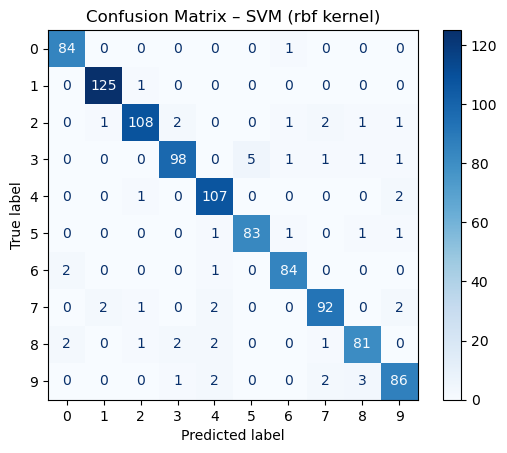

In [9]:
# 📦 Imports
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ✅ Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 🧹 Preprocess: Flatten images (28x28 → 784) and scale
X_train = X_train.reshape((X_train.shape[0], -1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)).astype('float32') / 255.0

# 🔁 You can also scale using StandardScaler if needed (optional)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# 🧠 Define kernels to compare
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

# 🕒 Train and evaluate SVM with each kernel
for kernel in kernels:
    print(f"\n🔍 Training SVM with {kernel} kernel...")
    clf = SVC(kernel=kernel, C=5, gamma='scale')  # You can tweak C and gamma
    clf.fit(X_train[:5000], y_train[:5000])  # For speed, use subset of training data
    y_pred = clf.predict(X_test[:1000])  # Evaluate on subset of test data
    acc = accuracy_score(y_test[:1000], y_pred)
    results[kernel] = acc
    print(f"✅ Accuracy with {kernel} kernel: {acc:.4f}")
    print(classification_report(y_test[:1000], y_pred))

# 📊 Summary of Results
print("\n📈 SVM Kernel Comparison:")
for kernel, acc in results.items():
    print(f"{kernel:8s} : {acc:.4f}")

# Optional: Confusion Matrix for one kernel
best_kernel = max(results, key=results.get)
clf = SVC(kernel=best_kernel, C=5, gamma='scale')
clf.fit(X_train[:5000], y_train[:5000])
y_pred = clf.predict(X_test[:1000])
ConfusionMatrixDisplay.from_predictions(y_test[:1000], y_pred, cmap='Blues')
plt.title(f"Confusion Matrix – SVM ({best_kernel} kernel)")
plt.show()

In [11]:
# 📦 Imports
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 📘 Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 🧹 Flatten & Normalize
X_train = X_train.reshape((X_train.shape[0], -1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)).astype('float32') / 255.0

# 🔁 Use subset for training speed
X_sub, y_sub = X_train[:5000], y_train[:5000]

# 📊 Define parameter grid
param_grid = {
    'C': [1, 5, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

# ⚙️ GridSearchCV setup
grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X_sub, y_sub)

# ✅ Best results
print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

# 🧪 Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test[:1000])
print("\nClassification Report on Test Set (1000 samples):")
print(classification_report(y_test[:1000], y_pred))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.9502008361833035

Classification Report on Test Set (1000 samples):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        85
           1       0.98      0.99      0.99       126
           2       0.96      0.92      0.94       116
           3       0.93      0.91      0.92       107
           4       0.94      0.96      0.95       110
           5       0.92      0.95      0.94        87
           6       0.95      0.97      0.96        87
           7       0.92      0.92      0.92        99
           8       0.93      0.89      0.91        89
           9       0.91      0.91      0.91        94

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

